# PROYECTO ANÁLISIS DE DATOS DE VUELO, GESTIÓN DEL EMPRENDIMIENTO Y LA TRANSFORMACIÓN E INNOVACIÓN DIGITAL 4.0



In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [27]:
import sklearn as skl

In [28]:
import seaborn as sns

In [29]:
df_vuelos = pd.read_csv("Flight_data.csv")

#### Accedo a una vista general de los datos del dataframe

In [30]:
df_vuelos

,Departure City,Arrival City,Departure Date,Flight Duration,Delay Minutes,Customer ID,Name,Booking Class,Frequent Flyer Status,Route,Ticket Price,Competitor Price,Demand,Origin,Destination,Profitability,Loyalty Points,Churned
0,Wilsonstad,Lake Johnmouth,2023-05-02 20:11:09,1.275810,120,3769,Daniel Oliver,Business,Gold,MEL-BNE,370.638128,382.947396,-0.932755,MEL,LHR,0.632226,4245,True
1,New Brent,Port Wanda,2023-04-21 00:10:14,1.275810,35,3529,Deborah Hall,Economy,Platinum,BNE-SYD,114.529016,394.583641,-1.005569,MEL,SIN,1.265026,833,True
2,South Samanthaberg,Lake Meganside,2023-05-12 15:16:31,0.721110,67,1303,Mary York,Economy,Platinum,MEL-BNE,164.468018,479.832444,1.761384,MEL,LAX,1.141651,2568,True
3,Lake Gracefurt,Jamesberg,2023-06-13 20:53:09,-0.942990,72,2965,Christina Sanchez,Economy,Gold,BNE-SYD,318.903167,286.301632,-0.520139,MEL,LAX,1.129291,284,True
4,Owenborough,Kelleymouth,2023-05-15 23:06:14,-0.388290,101,8779,Dustin Owens,Economy,Silver,BNE-SYD,389.971051,407.463316,-0.665768,BNE,SIN,1.218239,2805,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Brittneychester,South Patricia,2023-06-07 01:09:54,-1.497691,15,6848,Brittney Swanson,Economy,Silver,SYD-MEL,210.236193,275.963390,0.208007,BNE,LAX,1.127112,3522,True
96,South Staceyhaven,West Kenneth,2023-05-19 23:13:31,-1.497691,84,3724,Jessica Johnson,Business,Gold,BNE-SYD,184.330189,246.368703,-0.520139,BNE,SIN,0.569017,3244,True
97,Arnoldtown,Morriston,2023-05-22 11:51:34,0.166410,8,8395,Amber Mcclure,First,Gold,SYD-MEL,464.282801,199.549449,-0.981298,SYD,LAX,0.531339,1484,True
98,Murrayhaven,Lake Jennifermouth,2023-05-27 21:15:35,-0.942990,7,4142,Lisa Luna,First,Gold,BNE-SYD,457.453579,280.391721,0.741980,SYD,LHR,1.483030,1328,True


#### A través del comando info() muestro un resumen del dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada: esto me permite tener una mirada más específica de la estructura de los datos con los que estoy trabajando

In [31]:
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Departure City         100 non-null    object 
 1   Arrival City           100 non-null    object 
 2   Departure Date         100 non-null    object 
 3   Flight Duration        100 non-null    float64
 4   Delay Minutes          100 non-null    int64  
 5   Customer ID            100 non-null    int64  
 6   Name                   100 non-null    object 
 7   Booking Class          100 non-null    object 
 8   Frequent Flyer Status  100 non-null    object 
 9   Route                  100 non-null    object 
 10  Ticket Price           100 non-null    float64
 11  Competitor Price       100 non-null    float64
 12  Demand                 100 non-null    float64
 13  Origin                 100 non-null    object 
 14  Destination            100 non-null    object 
 15  Profita

#### Por último una vista de la cantidad de filas y columnas del dataFrame utilizando el atributo shape y concluimos esta primera parte en dónde observamos la estructura en dónde se encuentran los datos, además de la cantidad y el tipo de datos con los que vamos a trabajar 

In [32]:
df_vuelos.shape

(100, 18)

# Transformación de datos

### Imprimo una vista general de las columnas y los valores -

In [34]:
print(df_vuelos.describe)

<bound method NDFrame.describe of         Departure City        Arrival City       Departure Date  \
0           Wilsonstad      Lake Johnmouth  2023-05-02 20:11:09   
1            New Brent          Port Wanda  2023-04-21 00:10:14   
2   South Samanthaberg      Lake Meganside  2023-05-12 15:16:31   
3       Lake Gracefurt           Jamesberg  2023-06-13 20:53:09   
4          Owenborough         Kelleymouth  2023-05-15 23:06:14   
..                 ...                 ...                  ...   
95     Brittneychester      South Patricia  2023-06-07 01:09:54   
96   South Staceyhaven        West Kenneth  2023-05-19 23:13:31   
97          Arnoldtown           Morriston  2023-05-22 11:51:34   
98         Murrayhaven  Lake Jennifermouth  2023-05-27 21:15:35   
99          Butlerside    East Morganburgh  2023-06-03 14:46:08   

    Flight Duration  Delay Minutes  Customer ID               Name  \
0          1.275810            120         3769      Daniel Oliver   
1          1.275810  

#### Obtengo la media de los datos numéricos del dataset
##### Primera fila: 
Cuenta la cantidad de cada columna, en este caso corresponde a los 100 registros del dataSet. Hay que tener en cuenta que Flight Duration, Ticket Price, Competitor Price, Demand  y Profitability Son números flotantes y que Delay Minutes,  Customer ID y Loyalty Points son enteros- También se puede observar que las columnas FLYGHT DURATION Y DEMAND presentan valores negativos con otros carácteres.

##### Seguenda fila corresponde a la media:
Media o promedio: medida de tendencia central

#####  Tercera fila corresponde a la Desviación estándar: 
Médida de extensión o variabilidad en la estadística descriptiva. Se utiliza para calcular la variación o dispersión en la que los puntos de datos individuales difieren de la media.

##### Cuarta fila corresponde a la mín:
Es el valor máximo de la muestra

##### Quinta fila corresponde a los percentiles:
En este caso  25% es el primer cuartil

##### Sexta fila corresponde a los percentiles:
En este caso  25% es la mediana
##### Septima fila corresponde a los percentiles:
En este caso 75% es el tercer cuartil

##### Octava Fila: 
Es el valor máximo de la muestra


In [37]:
df_vuelos.describe()

,Flight Duration,Delay Minutes,Customer ID,Ticket Price,Competitor Price,Demand,Profitability,Loyalty Points
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,-1.387779e-16,57.900000,5164.630000,303.337169,292.867827,-1.776357e-16,1.031524,2390.420000
std,1.005038e+00,33.195929,2626.451593,119.160993,113.418380,1.005038e+00,0.273866,1522.693017
min,-1.497691e+00,1.000000,1010.000000,114.529016,93.418926,-1.660900e+00,0.515533,45.000000
25%,-9.429903e-01,33.750000,3090.500000,191.771980,208.760294,-8.356685e-01,0.869040,1063.500000
50%,1.664101e-01,57.000000,4922.000000,297.944962,278.177555,-5.897980e-02,1.033363,2178.000000
75%,8.597853e-01,81.500000,7202.750000,412.563311,390.125772,6.570301e-01,1.221841,3818.500000
max,1.275810e+00,120.000000,9861.000000,498.549369,479.832444,1.979828e+00,1.492505,4950.000000


### Conteo de los subniveles de las columnas

In [51]:
cols_cat = ["Flight Duration", "Departure Date", "Delay Minutes", "Ticket Price","Competitor Price","Demand","Profitability", "Loyalty Points", "Departure City", "Arrival City", "Booking Class", "Frequent Flyer Status", "Route", "Origin", "Destination", "Name", "Loyalty Points"]

In [52]:
for col in cols_cat:
    print(f'columna {col}: {df_vuelos[col].nunique()} subniveles')

columna Flight Duration: 6 subniveles
columna Departure Date: 100 subniveles
columna Delay Minutes: 65 subniveles
columna Ticket Price: 100 subniveles
columna Competitor Price: 100 subniveles
columna Demand: 74 subniveles
columna Profitability: 100 subniveles
columna Loyalty Points: 99 subniveles
columna Departure City: 100 subniveles
columna Arrival City: 99 subniveles
columna Booking Class: 3 subniveles
columna Frequent Flyer Status: 3 subniveles
columna Route: 3 subniveles
columna Origin: 3 subniveles
columna Destination: 3 subniveles
columna Name: 100 subniveles
columna Loyalty Points: 99 subniveles


### Compruebo que no hay filas repetidas

In [53]:
print(f'Tamañó del set antes de eliminar las filas repetidas: {df_vuelos.shape}')
df_vuelos.drop_duplicates(inplace = True)
print(f'Tamañó del set después de eliminar las filas repetidas: {df_vuelos.shape}')

Tamañó del set antes de eliminar las filas repetidas: (100, 18)
Tamañó del set después de eliminar las filas repetidas: (100, 18)


### Gráficos de variables categóricas de:  Clase o categoría del vuelo, Categoria de viajero, Ruta, Origen, Destino y Duración de viaje

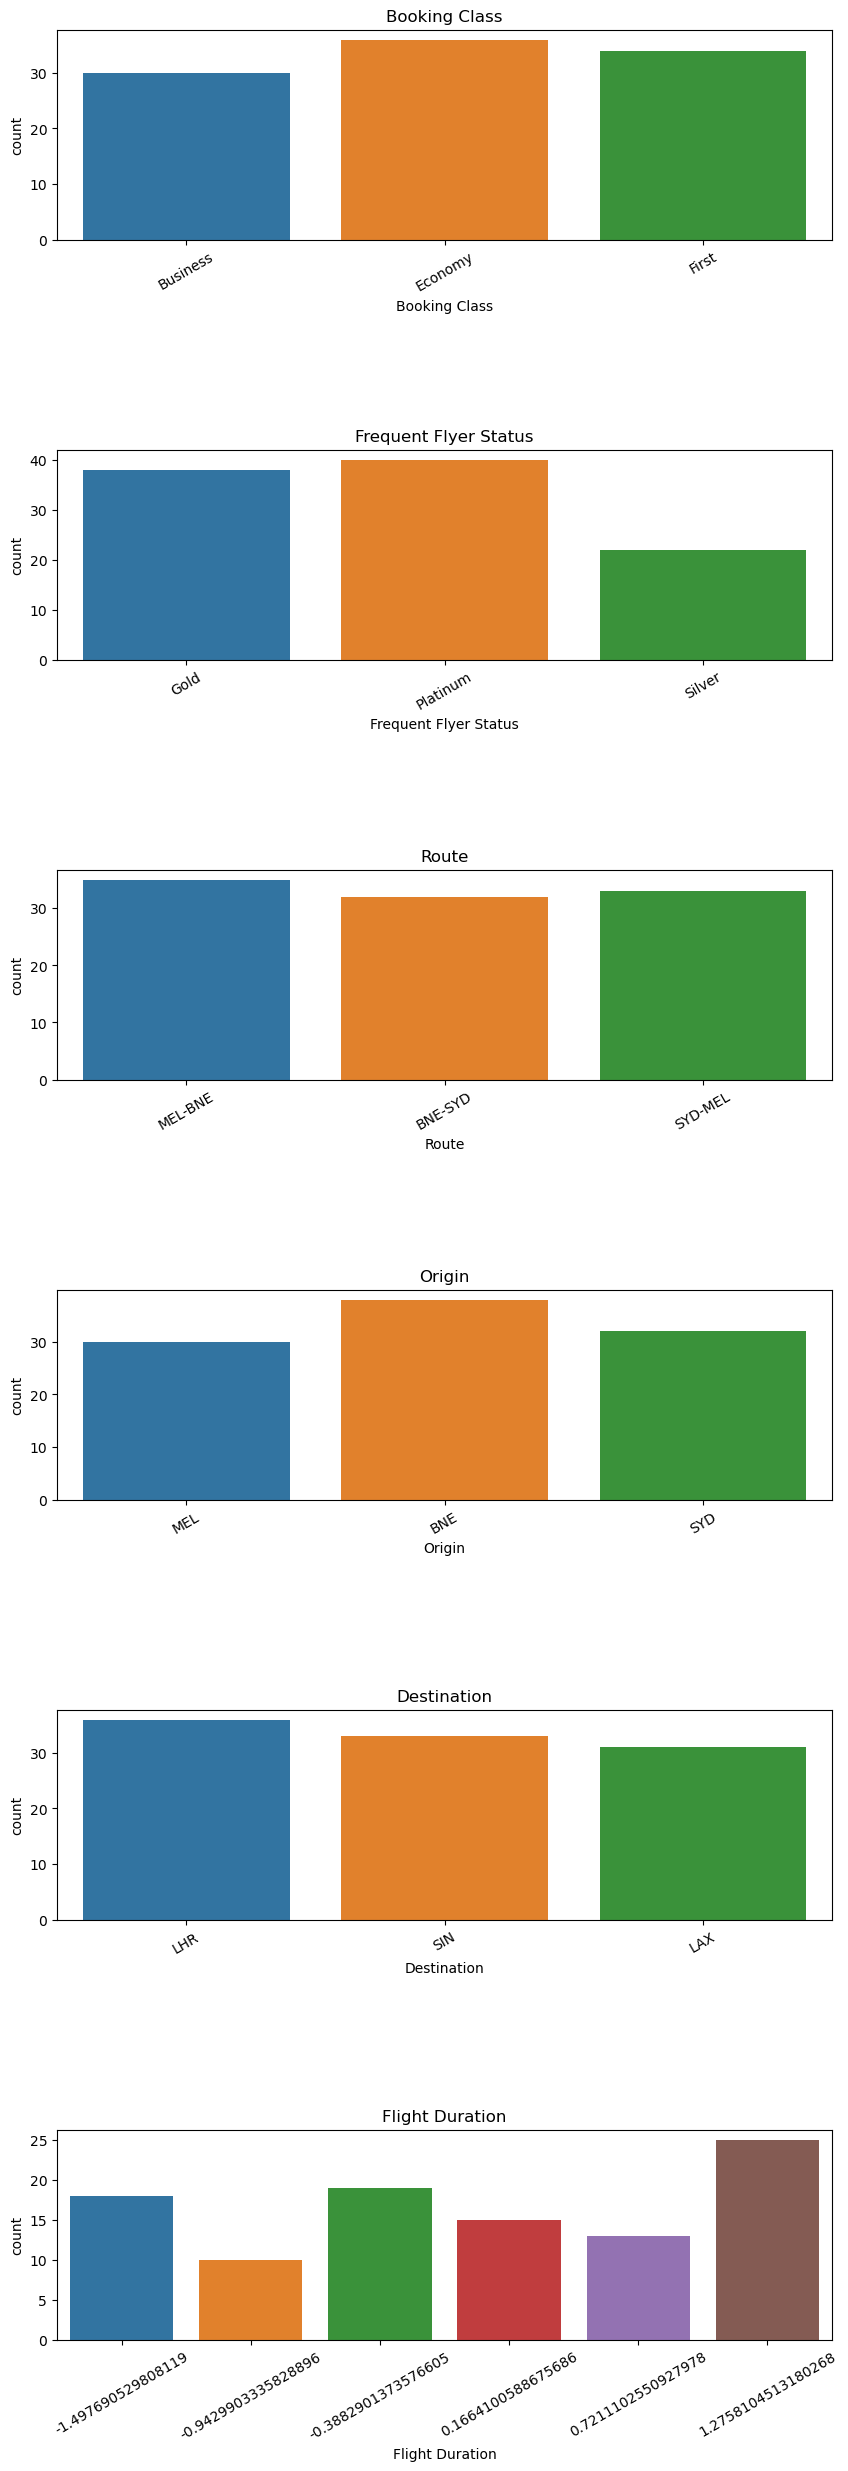

In [60]:
cols_cat = ["Booking Class", "Frequent Flyer Status", "Route", "Origin", "Destination", "Flight Duration"]
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data = df_vuelos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

### Valores extremos de las columnas núméricas

#### Precio de Ticket y Precio Competidor

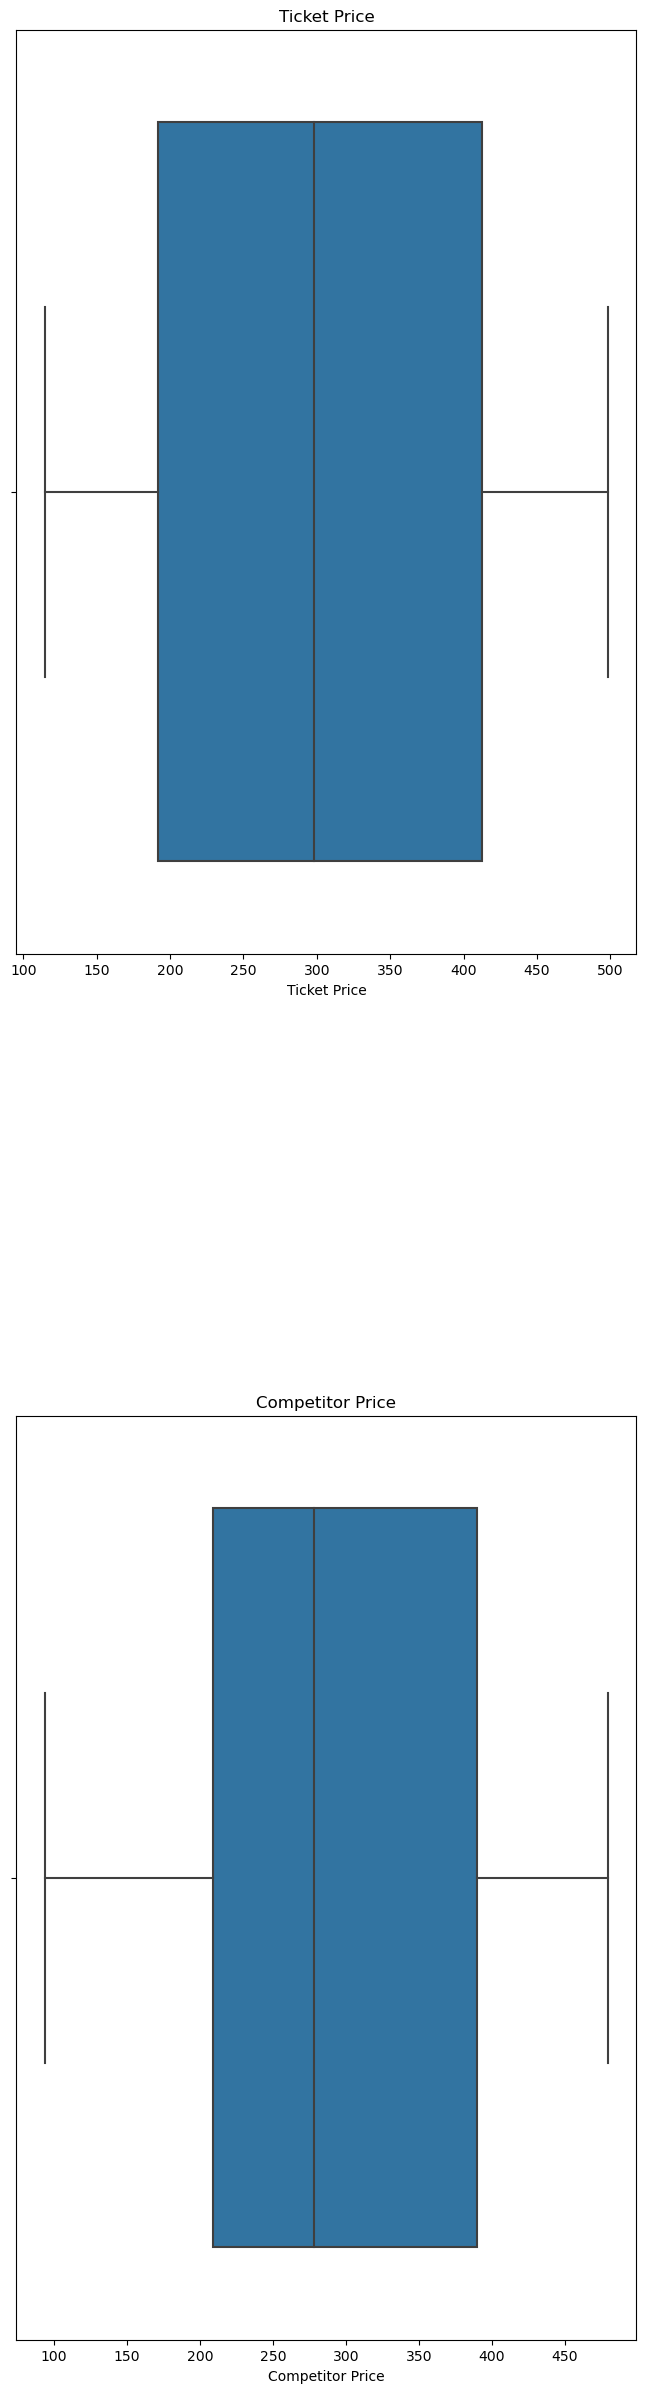

In [63]:
cols_num = ["Ticket Price", "Competitor Price"]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data = df_vuelos, ax=ax[i])
    ax[i].set_title(col)

#### Demanda y Rentabilidad

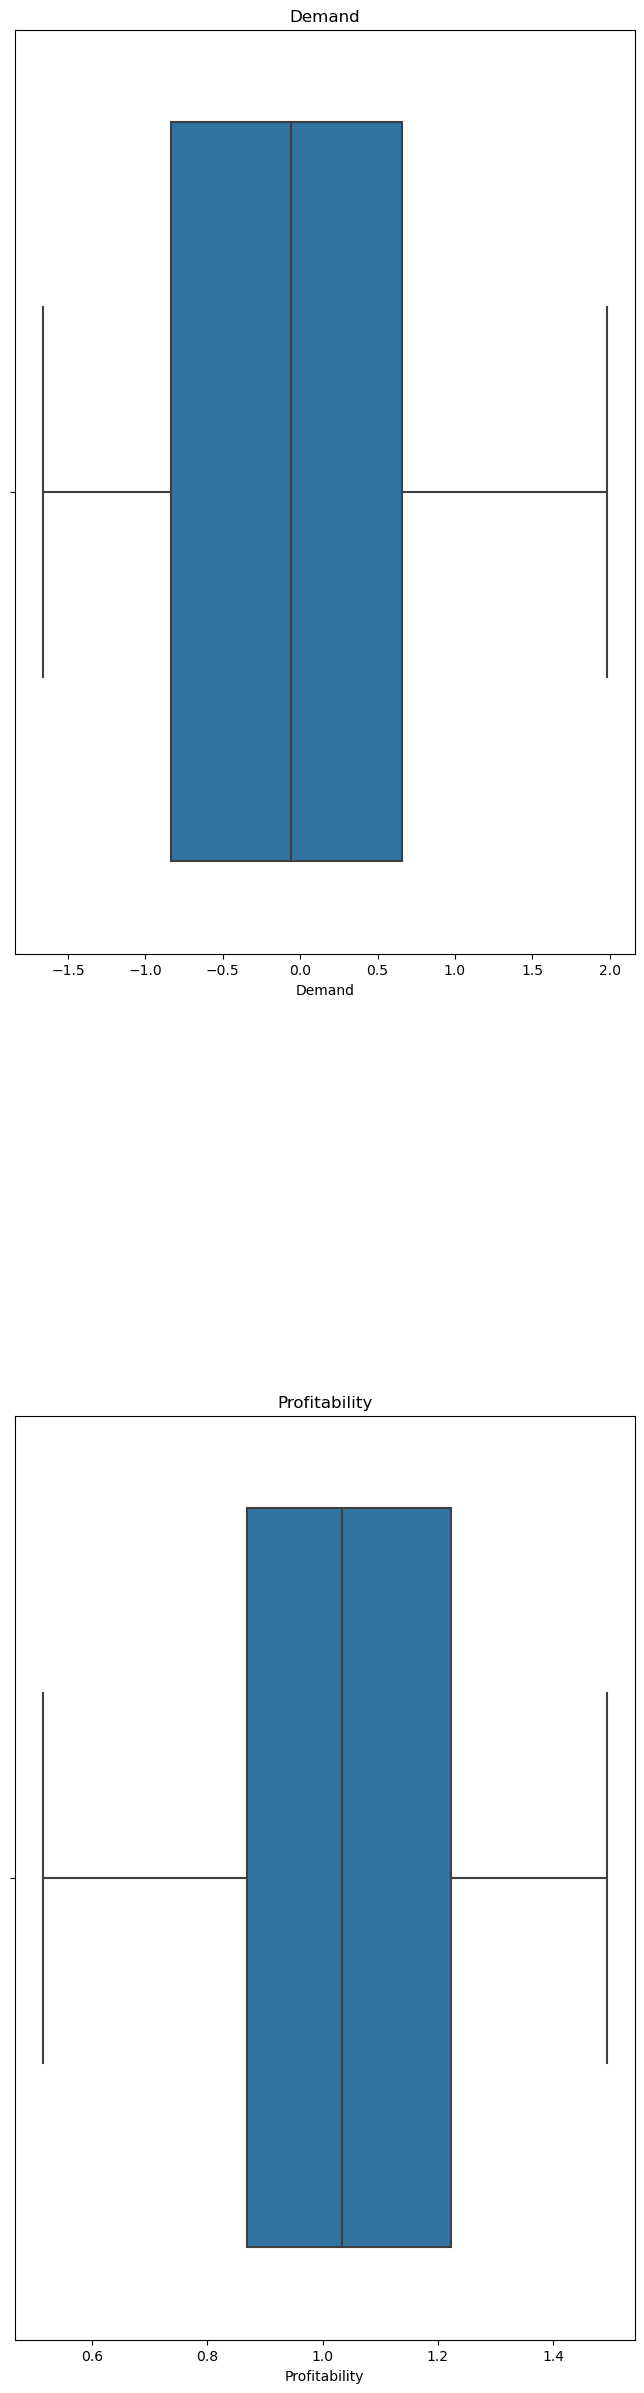

In [64]:
cols_num = ["Demand", "Profitability"]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data = df_vuelos, ax=ax[i])
    ax[i].set_title(col)

#### Duración por vuelo y Minutos de retraso

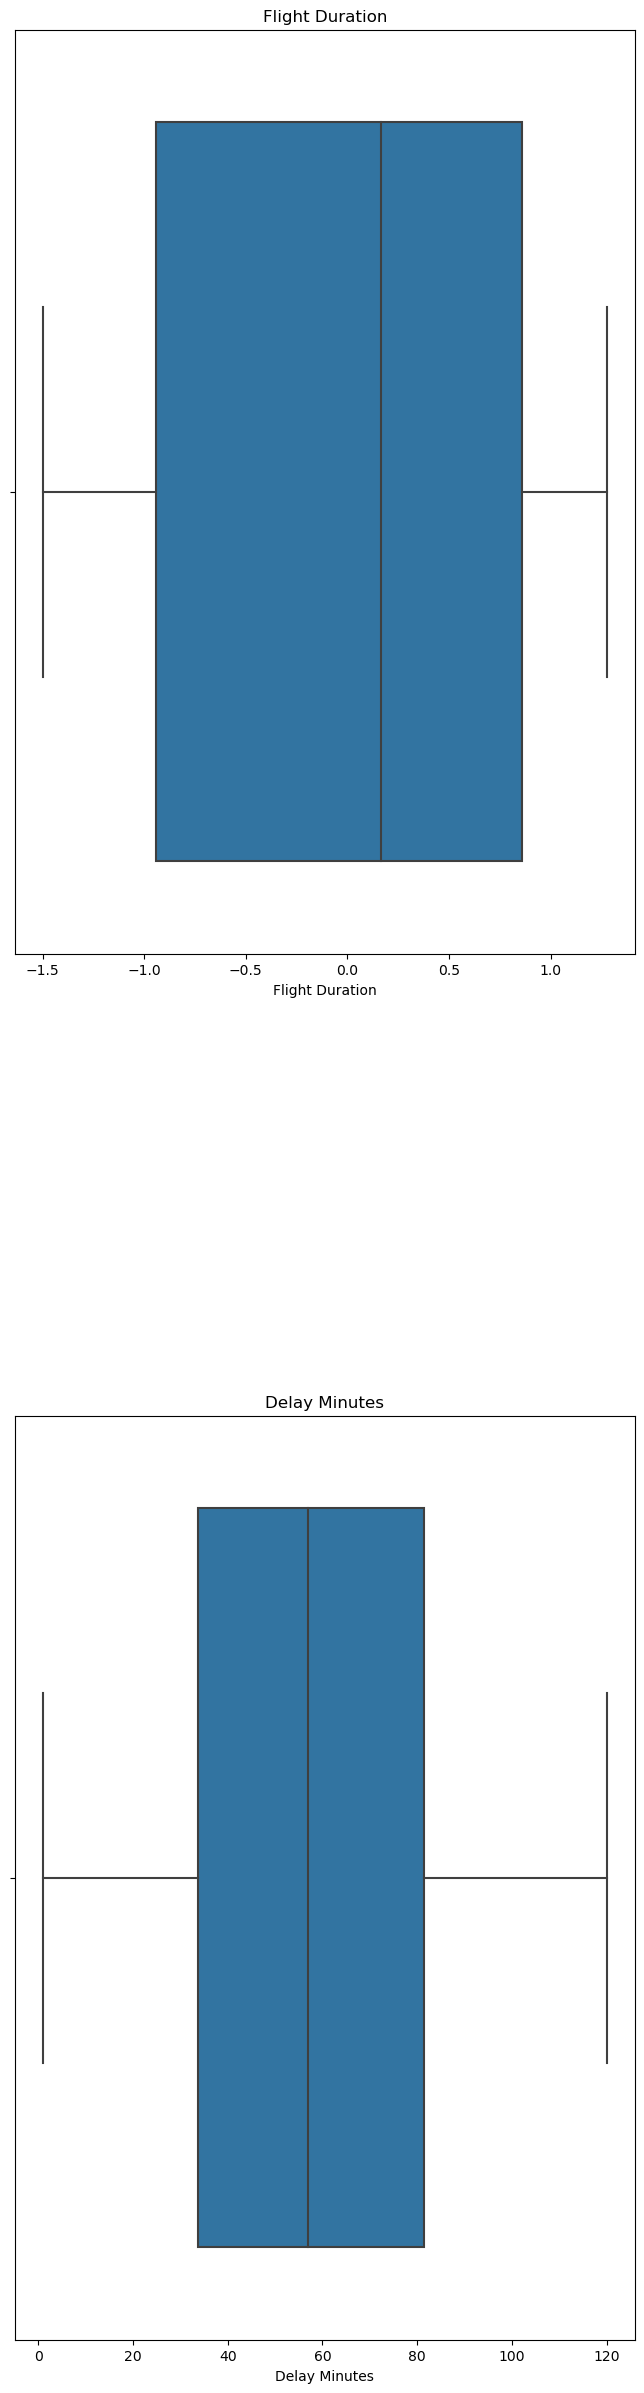

In [65]:
cols_num = ["Flight Duration", "Delay Minutes"]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data = df_vuelos, ax=ax[i])
    ax[i].set_title(col)

In [68]:
df_vuelos = df_vuelos.set_index('Customer ID')

In [69]:
df_vuelos

,Departure City,Arrival City,Departure Date,Flight Duration,Delay Minutes,Name,Booking Class,Frequent Flyer Status,Route,Ticket Price,Competitor Price,Demand,Origin,Destination,Profitability,Loyalty Points,Churned
Customer ID,,,,,,,,,,,,,,,,,
3769,Wilsonstad,Lake Johnmouth,2023-05-02 20:11:09,1.275810,120,Daniel Oliver,Business,Gold,MEL-BNE,370.638128,382.947396,-0.932755,MEL,LHR,0.632226,4245,True
3529,New Brent,Port Wanda,2023-04-21 00:10:14,1.275810,35,Deborah Hall,Economy,Platinum,BNE-SYD,114.529016,394.583641,-1.005569,MEL,SIN,1.265026,833,True
1303,South Samanthaberg,Lake Meganside,2023-05-12 15:16:31,0.721110,67,Mary York,Economy,Platinum,MEL-BNE,164.468018,479.832444,1.761384,MEL,LAX,1.141651,2568,True
2965,Lake Gracefurt,Jamesberg,2023-06-13 20:53:09,-0.942990,72,Christina Sanchez,Economy,Gold,BNE-SYD,318.903167,286.301632,-0.520139,MEL,LAX,1.129291,284,True
8779,Owenborough,Kelleymouth,2023-05-15 23:06:14,-0.388290,101,Dustin Owens,Economy,Silver,BNE-SYD,389.971051,407.463316,-0.665768,BNE,SIN,1.218239,2805,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,Brittneychester,South Patricia,2023-06-07 01:09:54,-1.497691,15,Brittney Swanson,Economy,Silver,SYD-MEL,210.236193,275.963390,0.208007,BNE,LAX,1.127112,3522,True
3724,South Staceyhaven,West Kenneth,2023-05-19 23:13:31,-1.497691,84,Jessica Johnson,Business,Gold,BNE-SYD,184.330189,246.368703,-0.520139,BNE,SIN,0.569017,3244,True
8395,Arnoldtown,Morriston,2023-05-22 11:51:34,0.166410,8,Amber Mcclure,First,Gold,SYD-MEL,464.282801,199.549449,-0.981298,SYD,LAX,0.531339,1484,True


### Analisis de los datos: Ciudad de salida de vuelo

In [70]:
df_vuelos['Departure City'].value_counts(dropna=False)

Wilsonstad        1
North Selena      1
Josephview        1
Coryton           1
Port Cory         1
                 ..
North Lorifurt    1
New Sarashire     1
Gregorystad       1
Port Edgar        1
Butlerside        1
Name: Departure City, Length: 100, dtype: int64

### Analisis de los datos: Cuidad destino de vuelo

In [71]:
df_vuelos['Arrival City'].value_counts(dropna=False)

Port Robert         2
Lake Johnmouth      1
Katherineburgh      1
Hillport            1
Russellberg         1
                   ..
Johnsontown         1
West Graceside      1
Hamiltonburgh       1
Aliciaview          1
East Morganburgh    1
Name: Arrival City, Length: 99, dtype: int64

### Análisis de los datos: Duración de los vuelos

In [72]:
df_vuelos['Flight Duration'].value_counts(dropna=False)

 1.275810    25
-0.388290    19
-1.497691    18
 0.166410    15
 0.721110    13
-0.942990    10
Name: Flight Duration, dtype: int64

### Duración del viaje con sus rutas correspondiente

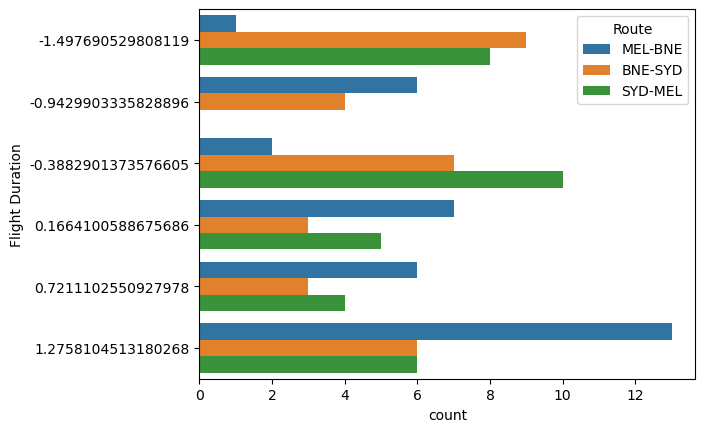

In [88]:
sns.countplot(y='Flight Duration', hue='Route', data = df_vuelos)
plt.show()

### Duración del viaje relacionado con la categoría de viaje

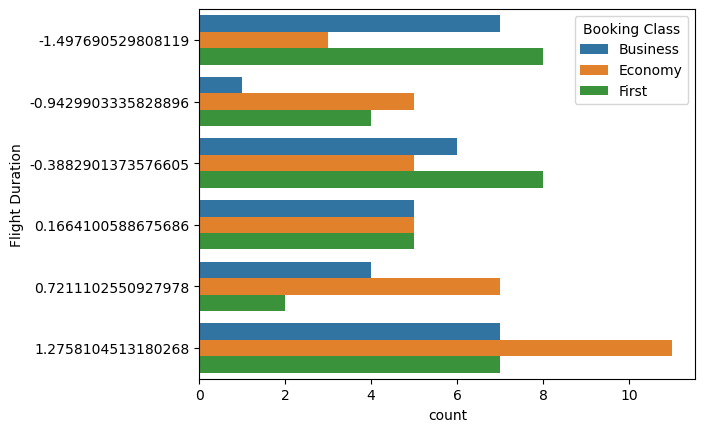

In [110]:
sns.countplot(y='Flight Duration', hue='Booking Class', data = df_vuelos)
plt.show()

### Relación entre duración del viaje y estatus de viajero

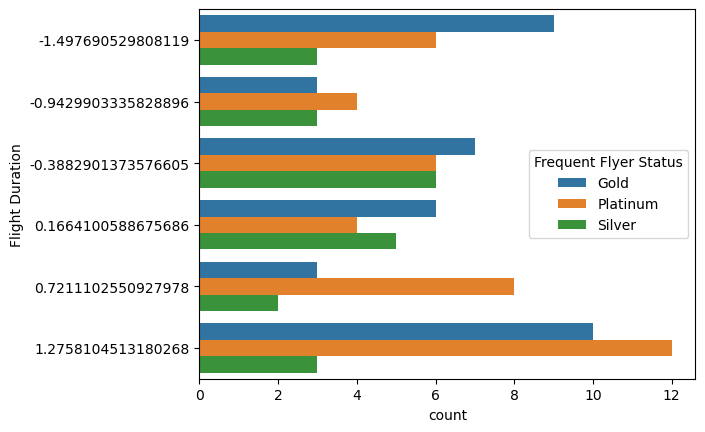

In [111]:
sns.countplot(y='Flight Duration', hue='Frequent Flyer Status', data = df_vuelos)
plt.show()

### Análisis de los datos: Minutos de retraso

In [76]:
df_vuelos['Delay Minutes'].value_counts(dropna=False)

34    6
70    3
44    3
28    3
47    3
     ..
86    1
81    1
85    1
52    1
1     1
Name: Delay Minutes, Length: 65, dtype: int64

### Análisis de los datos: Categoría de vuelo

In [74]:
df_vuelos['Booking Class'].value_counts(dropna=False)

Economy     36
First       34
Business    30
Name: Booking Class, dtype: int64

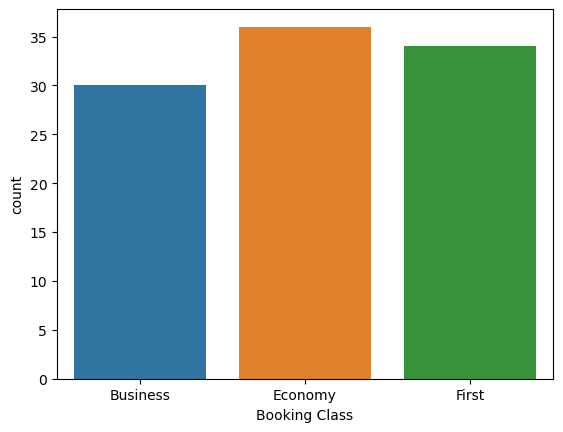

In [93]:
sns.countplot(x='Booking Class', data = df_vuelos)
plt.show()

### Análisis de los datos: Categoría de cliente

In [75]:
df_vuelos['Frequent Flyer Status'].value_counts(dropna=False)

Platinum    40
Gold        38
Silver      22
Name: Frequent Flyer Status, dtype: int64

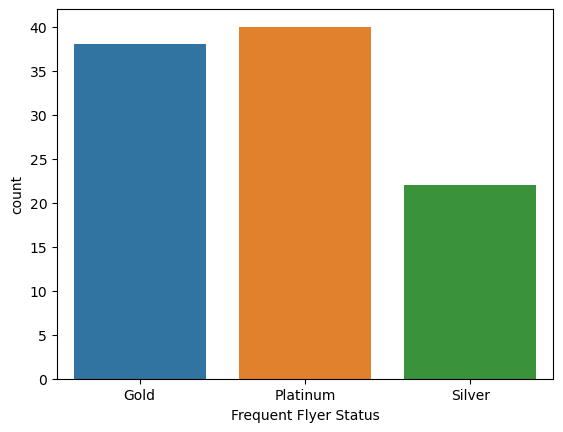

In [100]:
sns.countplot(x='Frequent Flyer Status', data = df_vuelos)
plt.show()

### Categoría de vuelo por status de clientes (Plan de lealtad al viajero)

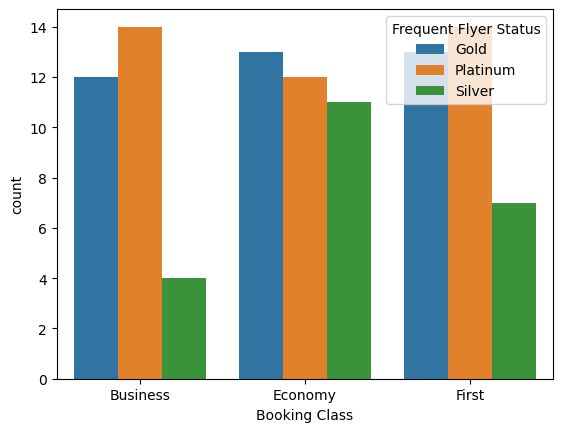

In [101]:
sns.countplot(x='Booking Class', hue='Frequent Flyer Status', data = df_vuelos)
plt.show()

### Análisis de los datos: Rutas

In [77]:
df_vuelos['Route'].value_counts(dropna=False)

MEL-BNE    35
SYD-MEL    33
BNE-SYD    32
Name: Route, dtype: int64

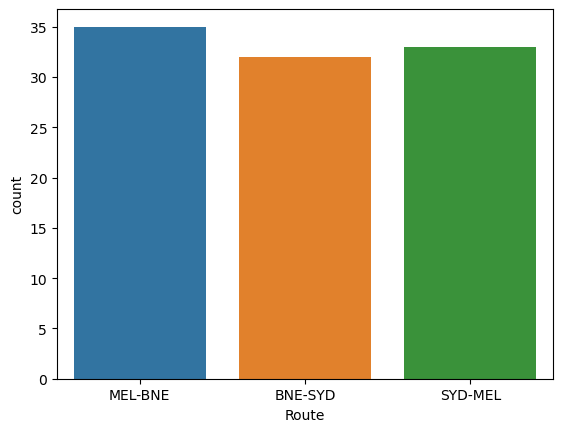

In [104]:
sns.countplot(x='Route', data = df_vuelos)
plt.show()

### Categoría de cliente por Ruta

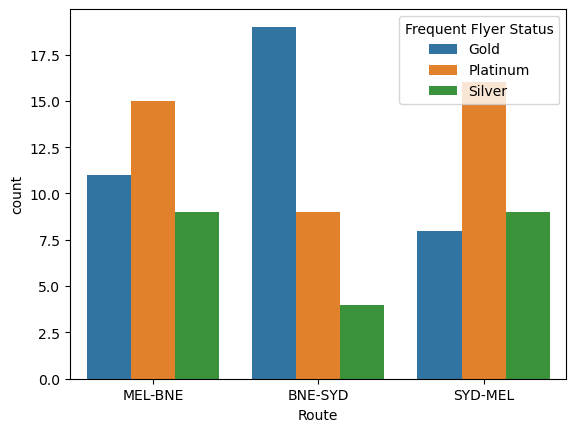

In [113]:
sns.countplot(x='Route', hue='Frequent Flyer Status', data = df_vuelos)
plt.show()

### Categoría de viaje por Rutas

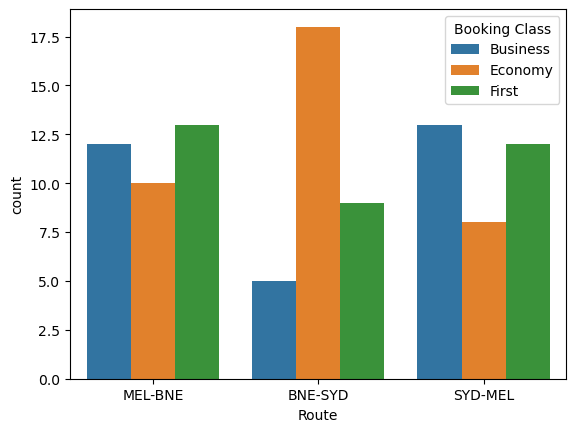

In [105]:
sns.countplot(x='Route', hue='Booking Class', data = df_vuelos)
plt.show()

### Análisis de los datos: Precio de los tickets

In [78]:
df_vuelos['Ticket Price'].value_counts(dropna=False)

370.638128    1
448.844622    1
304.873940    1
436.380354    1
365.436476    1
             ..
395.598572    1
455.298615    1
259.555011    1
290.924463    1
168.629774    1
Name: Ticket Price, Length: 100, dtype: int64

### Análisis de los datos: Precio de los tickets de los competidores

In [80]:
df_vuelos['Competitor Price'].value_counts(dropna=False)

382.947396    1
412.562511    1
450.676773    1
348.717050    1
234.707368    1
             ..
437.424572    1
284.022224    1
230.109390    1
391.020964    1
425.605440    1
Name: Competitor Price, Length: 100, dtype: int64

### Análisis de los datos: Demanda

In [81]:
df_vuelos['Demand'].value_counts(dropna=False)

-0.325967    4
-0.520139    3
 0.402179    3
-1.660900    3
-0.301695    2
            ..
 1.081782    1
 0.790523    1
 0.329365    1
 1.421583    1
 0.741980    1
Name: Demand, Length: 74, dtype: int64

### Análisis de los datos: Origen del viaje

In [82]:
df_vuelos['Origin'].value_counts(dropna=False)

BNE    38
SYD    32
MEL    30
Name: Origin, dtype: int64

###  Brisbane, Australia (BNE), Sidney Australia (SYD), Melbourn Australia (MEL)

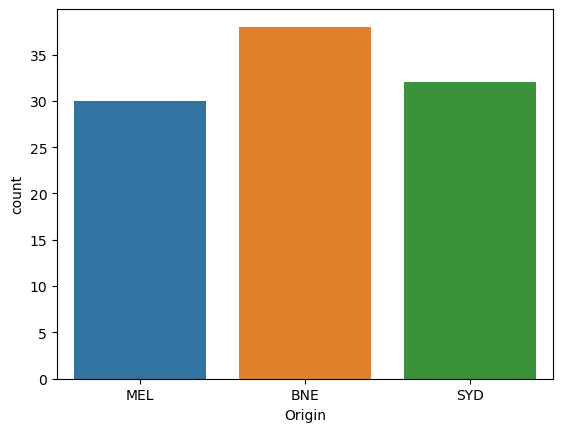

In [106]:
sns.countplot(x='Origin', data = df_vuelos)
plt.show()

### Origen del viaje vinculado a la Categoría de viaje
####  Brisbane, Australia (BNE), Sidney Australia (SYD), Melbourn Australia (MEL)

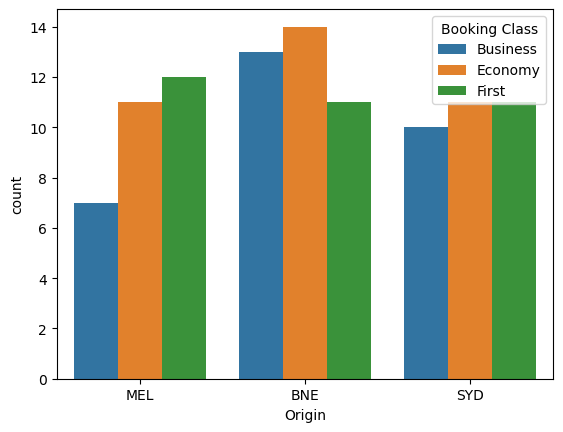

In [107]:
sns.countplot(x='Origin', hue='Booking Class', data = df_vuelos)
plt.show()

### Origenes del viaje relacionado con la Categoría de Cliente

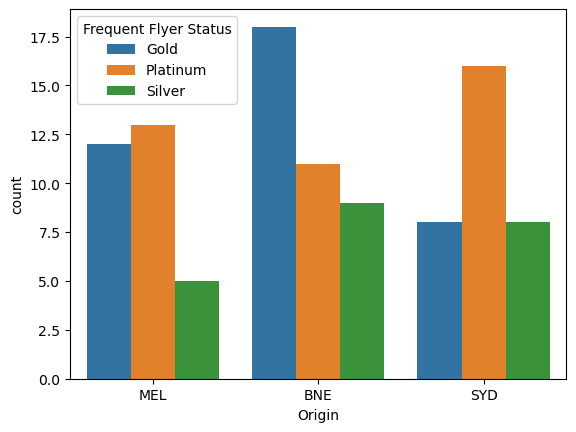

In [109]:
sns.countplot(x='Origin', hue='Frequent Flyer Status', data = df_vuelos)
plt.show()

### Análisis de los datos: Destino del viaje

In [83]:
df_vuelos['Destination'].value_counts(dropna=False)

LHR    36
SIN    33
LAX    31
Name: Destination, dtype: int64

### Londres, Reino Unido (LHR), Singapur (SIN), Los Angeles, California EE. UU (LAX)

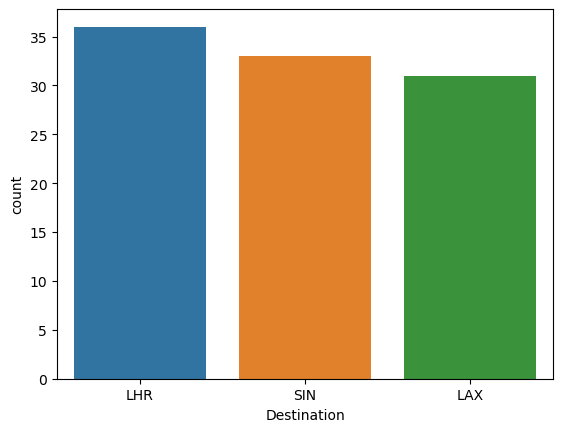

In [114]:
sns.countplot(x='Destination', data = df_vuelos)
plt.show()

### Relación entre el Destino del viaje y el Origen 

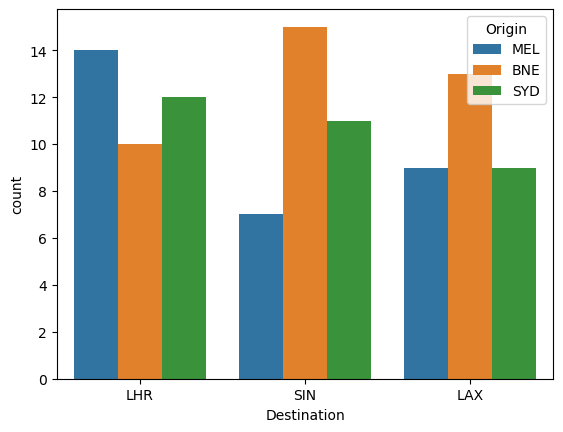

In [115]:
sns.countplot(x='Destination', hue='Origin', data = df_vuelos)
plt.show()

### Relación entre Destino de viaje y Categoria de viaje


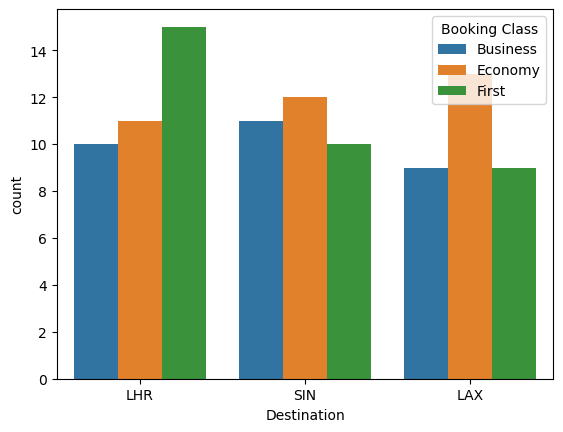

In [117]:
sns.countplot(x='Destination', hue='Booking Class', data = df_vuelos)
plt.show()

### Relación entre Destino de viaje y Categoría de Cliente

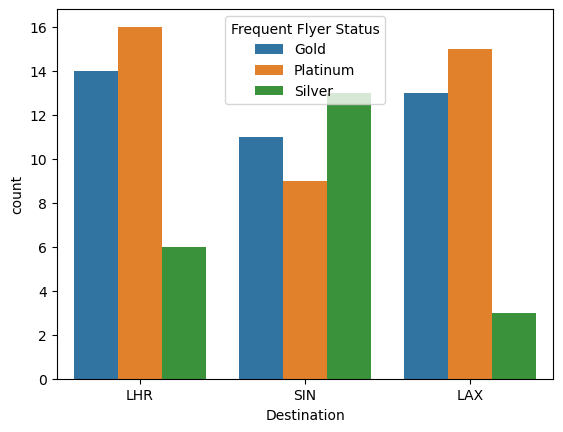

In [119]:
sns.countplot(x='Destination', hue='Frequent Flyer Status', data = df_vuelos)
plt.show()

### Relación Destino de viaje con Duración de vuelo

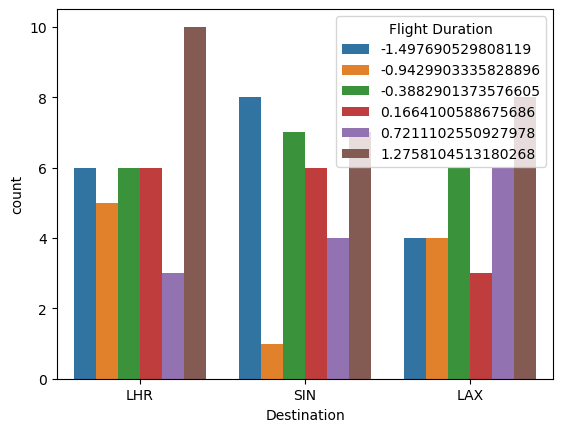

In [120]:
sns.countplot(x='Destination', hue='Flight Duration', data = df_vuelos)
plt.show()

### Análisis de los datos: Rentabilidad del viaje

In [84]:
df_vuelos['Profitability'].value_counts(dropna=False)

0.632226    1
1.289209    1
1.094742    1
1.450384    1
1.121151    1
           ..
0.844142    1
0.556350    1
1.278904    1
1.056345    1
0.908496    1
Name: Profitability, Length: 100, dtype: int64

### Análisis de los datos: Puntos de lealtad del viajero

In [85]:
df_vuelos['Loyalty Points'].value_counts(dropna=False)

1059    2
4245    1
3659    1
1486    1
4840    1
       ..
3664    1
1544    1
639     1
2056    1
4950    1
Name: Loyalty Points, Length: 99, dtype: int64

### Análisis de los datos: Cancelación

In [86]:
df_vuelos['Churned'].value_counts(dropna=False)

True     53
False    47
Name: Churned, dtype: int64

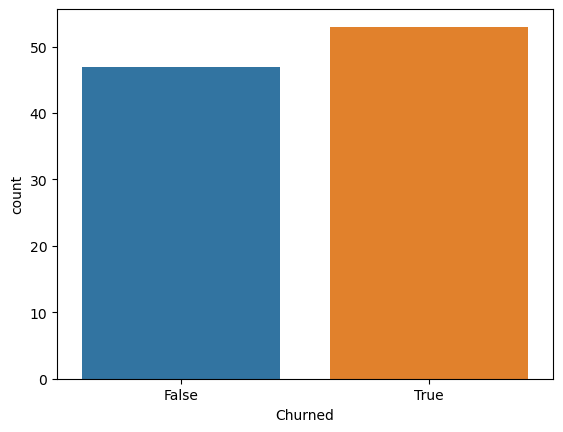

In [121]:
sns.countplot(x='Churned', data = df_vuelos)
plt.show()

### Relación entre la Cancelación y la Categoría de viaje

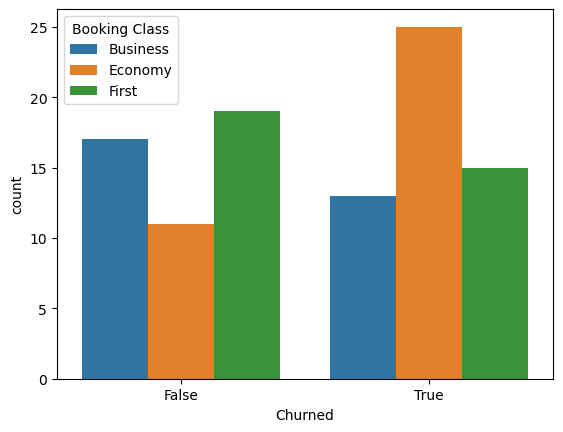

In [123]:
sns.countplot(x='Churned', hue='Booking Class', data = df_vuelos)
plt.show()

#### Cancelación relacionada a la Categoría de viaje

In [140]:
churn_x_categoria = df_vuelos.groupby(['Churned'])['Booking Class'].value_counts()

In [141]:
churn_x_categoria 

Churned  Booking Class
False    First            19
         Business         17
         Economy          11
True     Economy          25
         First            15
         Business         13
Name: Booking Class, dtype: int64

### Relación entre la Cancelación y Categoría de Cliente

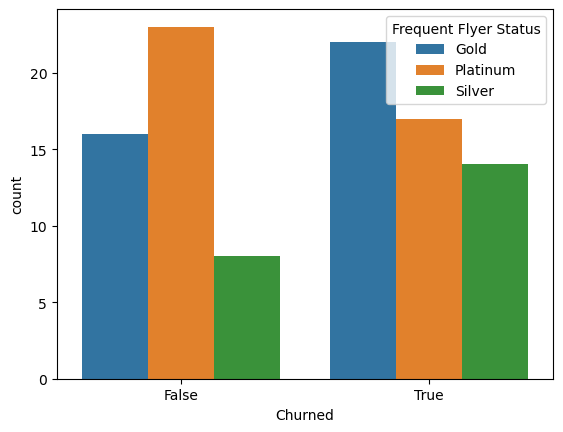

In [124]:
sns.countplot(x='Churned', hue='Frequent Flyer Status', data = df_vuelos)
plt.show()

#### Cancelación relacionada a la Categoría de Cliente

In [142]:
churn_x_status = df_vuelos.groupby(['Churned'])['Frequent Flyer Status'].value_counts()

In [143]:
churn_x_status

Churned  Frequent Flyer Status
False    Platinum                 23
         Gold                     16
         Silver                    8
True     Gold                     22
         Platinum                 17
         Silver                   14
Name: Frequent Flyer Status, dtype: int64

### Relación entre la Cancelación y Rutas

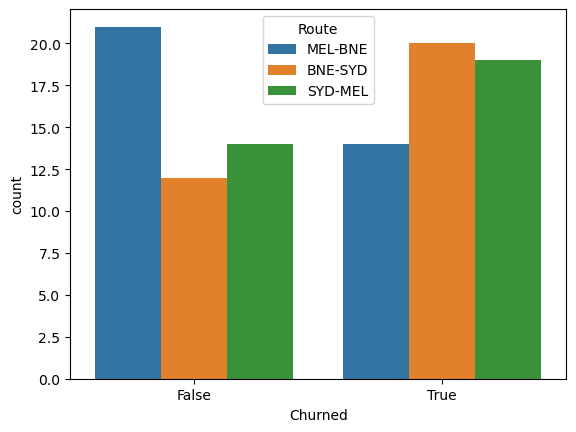

In [126]:
sns.countplot(x='Churned', hue='Route', data = df_vuelos)
plt.show()

#### Cancelación relacionada a las rutas

In [144]:
churn_x_routes = df_vuelos.groupby(['Churned'])['Route'].value_counts()

In [145]:
churn_x_routes

Churned  Route  
False    MEL-BNE    21
         SYD-MEL    14
         BNE-SYD    12
True     BNE-SYD    20
         SYD-MEL    19
         MEL-BNE    14
Name: Route, dtype: int64

### Relación entre la Cancelación y Origen del viaje

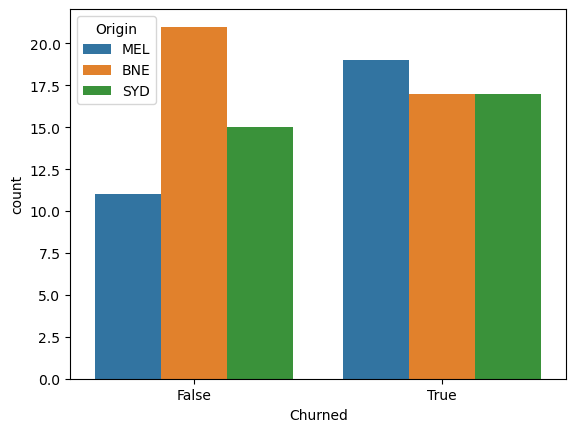

In [128]:
sns.countplot(x='Churned', hue='Origin', data = df_vuelos)
plt.show()

#### Cancelación relacionada al Origen de vuelo

In [146]:
churn_x_origin = df_vuelos.groupby(['Churned'])['Origin'].value_counts()

In [147]:
churn_x_origin

Churned  Origin
False    BNE       21
         SYD       15
         MEL       11
True     MEL       19
         BNE       17
         SYD       17
Name: Origin, dtype: int64

### Relación entre la cancelación y Destino del viaje

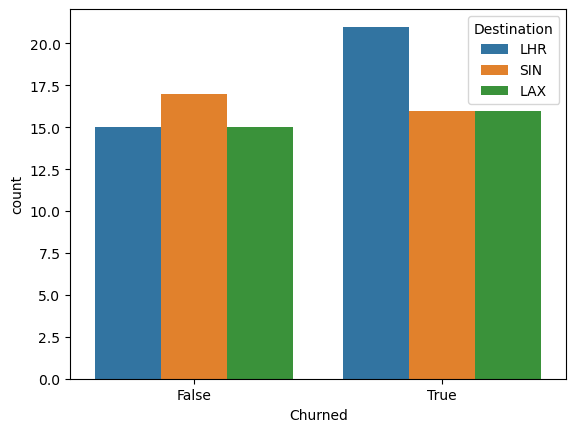

In [129]:
sns.countplot(x='Churned', hue='Destination', data = df_vuelos)
plt.show()

In [148]:
churn_x_destination = df_vuelos.groupby(['Churned'])['Destination'].value_counts()

In [149]:
churn_x_destination

Churned  Destination
False    SIN            17
         LAX            15
         LHR            15
True     LHR            21
         LAX            16
         SIN            16
Name: Destination, dtype: int64

### Mínimos, Máximos, Media y std en los minutos de retrasos de los vuelos

In [150]:
df_vuelos['Delay Minutes'].min()

1

In [151]:
df_vuelos['Delay Minutes'].max()

120

In [169]:
df_vuelos['Delay Minutes'].mean()

57.9

In [170]:
df_vuelos['Delay Minutes'].std()

33.19592892162678

### Mínimos, Máximos, Media y std en los Precios de los Tickets

In [153]:
df_vuelos['Ticket Price'].min()

114.52901630896034

In [154]:
df_vuelos['Ticket Price'].max()

498.5493692899824

In [173]:
df_vuelos['Ticket Price'].mean()

303.33716947201077

In [174]:
df_vuelos['Ticket Price'].std()

119.1609926135195

### Mínimos, Máximos, Media y std en  en los Precios de los Tickets de los Competidores

In [155]:
df_vuelos['Competitor Price'].min()

93.41892580587766

In [156]:
df_vuelos['Competitor Price'].max()

479.83244389376665

In [175]:
df_vuelos['Competitor Price'].mean()

292.86782727206764

In [176]:
df_vuelos['Competitor Price'].std()

113.41837986263944

### Mínimos, Máximos, Media y std en la rentabilidad

In [157]:
df_vuelos['Profitability'].min()

0.5155334933804878

In [158]:
df_vuelos['Profitability'].max()

1.4925051350807657

In [177]:
df_vuelos['Profitability'].mean()

1.0315242042737827

In [178]:
df_vuelos['Profitability'].std()

0.2738659856674066

###  Precio de los Tickets relacionado con los puntos de lealtad

In [160]:
df_vuelos.groupby('Ticket Price')['Loyalty Points'].sum() 

Ticket Price
114.529016     833
116.490246    4764
117.430166     234
123.967678    1893
126.168809    4322
              ... 
487.354664    4161
488.013472    1181
488.541155    1133
490.702460    4434
498.549369    4654
Name: Loyalty Points, Length: 100, dtype: int64

### Máximo en vuelo

In [161]:
df_vuelos.max()

Departure City                    Wilsonstad
Arrival City               West Victoriaside
Departure Date           2023-06-16 21:25:28
Flight Duration                      1.27581
Delay Minutes                            120
Name                          Willie Shaffer
Booking Class                          First
Frequent Flyer Status                 Silver
Route                                SYD-MEL
Ticket Price                      498.549369
Competitor Price                  479.832444
Demand                              1.979828
Origin                                   SYD
Destination                              SIN
Profitability                       1.492505
Loyalty Points                          4950
Churned                                 True
dtype: object

### Mínimo en vuelo

In [162]:
df_vuelos.min()

Departure City                  Aprilchester
Arrival City                      Aliciaview
Departure Date           2023-04-18 01:13:37
Flight Duration                    -1.497691
Delay Minutes                              1
Name                          Aaron Williams
Booking Class                       Business
Frequent Flyer Status                   Gold
Route                                BNE-SYD
Ticket Price                      114.529016
Competitor Price                   93.418926
Demand                               -1.6609
Origin                                   BNE
Destination                              LAX
Profitability                       0.515533
Loyalty Points                            45
Churned                                False
dtype: object

In [163]:
df_vuelos['Ticket Price'].value_counts(dropna=False)

370.638128    1
448.844622    1
304.873940    1
436.380354    1
365.436476    1
             ..
395.598572    1
455.298615    1
259.555011    1
290.924463    1
168.629774    1
Name: Ticket Price, Length: 100, dtype: int64

In [166]:
df_vuelos['Ticket Price'].min()

114.52901630896034